## First linear regresion fun

In [1]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [3]:
# to make this notebook's output stable across runs
import numpy as np
np.random.seed(42)

## the model is y=4+3x

In [4]:
import numpy as np
X=2*np.random.rand(100,1)
y=4 + 3*X + np.random.randn(100,1)
print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


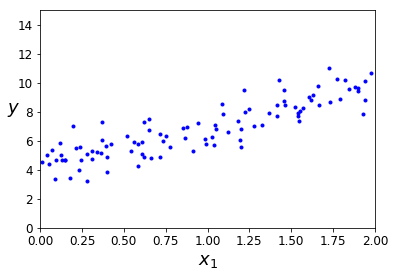

In [5]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
X_b=np.c_[np.ones((100,1)), X]   # add x0=1 to each instance
print(X_b.shape)

(100, 2)


In [7]:
X[:5,:]

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728]])

In [8]:
X_b[:5,:]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

## from X_b and y, we have theta_best( theta_0 is the bias)
## First let's use numpy's linear algebra

In [9]:
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [10]:
print(theta_best)

[[4.21509616]
 [2.77011339]]


## test with input:  0 and 2

In [11]:
X_new=np.array([[0],[2]])

In [12]:
print(X_new)

[[0]
 [2]]


In [13]:
X_new_b=np.c_[np.ones((2,1)),X_new] # add x0=1 to each instance

In [14]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [15]:
y_pred=X_new_b.dot(theta_best)

In [16]:
y_pred

array([[4.21509616],
       [9.75532293]])

## red line from two points

(100, 1)
(100, 2)
(100, 1)


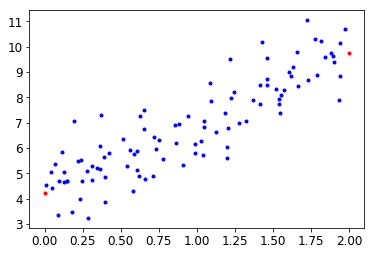

In [18]:
print(X.shape)
print(X_b.shape)
print(y.shape)
plt.plot(X,y,"b.")
plt.plot(X_new,y_pred,"r.")
#plt.plot(X_new,y_pred,"r-")
plt.show()

## now let's try Scikit-Learn

In [19]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

In [20]:
print(lin_reg.fit(X, y))
print(type(lin_reg.fit(X, y)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
<class 'sklearn.linear_model.base.LinearRegression'>


In [21]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [22]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [23]:
X_new

array([[0],
       [2]])

In [24]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## now let's try tensorflow

In [25]:
import tensorflow as tf

In [26]:
print(X.shape)
print(X_b.shape)
print(y.shape)

(100, 1)
(100, 2)
(100, 1)


In [31]:
XX = tf.constant(X_b, dtype=tf.float32, name="XX")
yy = tf.constant(y, dtype=tf.float32, name="yy")
XXT = tf.transpose(XX)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XXT, XX)), XXT), yy)

with tf.Session() as sess:
    theta_value = theta.eval()

In [32]:
theta_value

array([[4.215094 ],
       [2.7701144]], dtype=float32)